### Principal component analysis (PCA)

PCA is most commonly used dimensionality reduction technique. It helps to reduce number of features which inturn helps to improve the model performance and visualize complex dataset

In [212]:
#import all the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [213]:
df = pd.read_csv('iris.csv')

In [214]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [215]:
y = df.pop('Species')

In [216]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [217]:
df.drop('Id',axis=1,inplace = True)

In [218]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


scale the dataset

In [219]:
from sklearn.preprocessing import StandardScaler

In [220]:
scaler = StandardScaler()

In [221]:
x = scaler.fit_transform(df)

Applying PCA on the dataset

In [222]:
from sklearn.decomposition import PCA

In [223]:
pca = PCA(random_state=42)

In [224]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [225]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [226]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

from `pca.explained_variance_ratio_` we can see that how much variance is explained by each Principal Component. Hence, we can see that first component consist of 72% of the information from the dataset and so on.

Hence, we can see that the first two components can explain 95% of the dataset.Hence, in terms of reduce dimension, we can go ahead with first two component. 

However, for bigger dataset, with lots of column, it will not be so easy. Hence, we go ahead and create Scree Plot to visualize the same

### Scree Plot

In [227]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

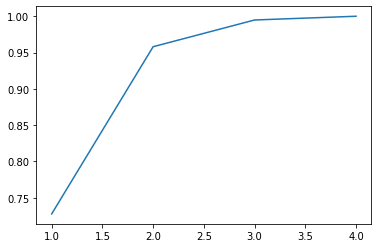

In [228]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

From the Scree Plot, we can see that 95% of information explained by 2 components. Hence, PCA with 2 components

In [229]:
pc2 = PCA(n_components=2, random_state=42)

In [230]:
newdata = pc2.fit_transform(df)

In [231]:
#create dataframe
df_new = pd.DataFrame(newdata, columns=["PC1", "PC2"])
df_new.head()

,PC1,PC2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [232]:
df = pd.concat([df_new, y], axis=1)

In [233]:
df.head()

,PC1,PC2,Species
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


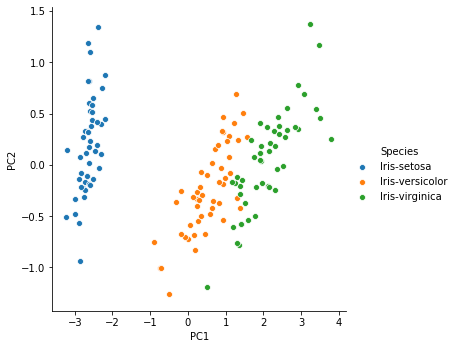

In [234]:
# Plot the data
sns.pairplot(data=df, x_vars=["PC1"], y_vars=["PC2"], hue = "Species", size=5)

### Summary

1. We can reduce number of column from 4 to 2. As we have already seen the 95% of the information of the dataset can be
explined by 2 components

2. Data Visualization using PCs : Since, we have reduced the number of columns, we can easily vilualize them by a scatter plot which would have not possible in a 2D surface when we have lot of features.

3. Generally, in practical scenario, we might required number of components more than 2 while using PCA. In that scenario, plot PC1 and PC2 to visualize since these two PCs mostly explain the variance of the dataset